In [1]:
import sys
sys.path.append('..')
import nbimport
nbimport.initialize()

In [2]:
from Stat_07 import *
css_styling()

# Profiler

# Profiles

## Formål 

- At kunne bruge _profiler_ i en statistisk analyse 
- At kunne skelne mellem _profiler_ og _histogrammer_

Ofte er vi interesseret i målinger af den gennemsnitlige $y$ som funktion af $x$.   Det vil sige vi i sidste ende er interesseret i at vise hvordan $y$ i _gennemsnit_ ændre sig som funktion af $x$, hvilket vi kan tænkte på som grafen $\bar{y}$ på ordinaten ("$y$"-aksen) mod $x$ på abscissa ("$x$"-aksen).   

## Purpose

- To be able to use _profiles_ in a statistical analysis
- To be able to distinguish between _profiles_ and _histograms_

Often we are interested in measurements of the average $y$ as a function of $x$. That is, we are ultimately interested in showing how $y$ on _average_ changes as a function of $x$, which we can think of as the graph $\bar{y}$ on the ordinate ("$y$" axis) against $x$ on abscissa ("$x$" axis).

Eksempler på den slags målinger i partikel-kollisioner er af det invariante transvers-impuls spectrum 

Examples of such measurements in particle collisions are of the invariant transverse momentum spectrum

$$\frac{1}{p_{\mathrm{T}}} \frac{\mathrm{d}N}{\mathrm{d}p_{\mathrm{T}}}\quad\text{versus}\quad p_{\mathrm{T}}\quad,$$

eller pseudorapiditetsfordelingen af ladet partikler 

or the pseudorapidity distribution of charged particles

$$\frac{\mathrm{d}N_{\mathrm{ch}}}{\mathrm{d}\eta}\quad\text{versus}\quad\eta\quad.$$

Begge disse målinger bliver lavet over mange begivenheder, hvor hver begivenhed har en bestemt _fordeling_ af transvers impuls eller pseudorapiditet.  

Det vil sige, at vi for _hver_ begivenhed at en bestemt realisation af en fordeling, og vi ønsker at finde den _gennemsnitlige_ fordeling.   Det betyder at histogrammer _ikke_ er velegent til at repræsenterer vores resultat i sidste ende.  Nok kan vi bruge histogrammer til at finde fordelingen for _en_ begivenhed, men i sidste ende vil vi have et gennemsnit over disse. 

Both of these measurements are made over many events where each event has a specific _distribution_ of transverse momentum or pseudorapidity.

That is, for _every_ event we have a specific realization of a distribution, and we want to find the _average_ distribution. This means that histograms _are not_ good for representing our result in the end. We may use histograms to find the distribution for _an_ event, but in the end we will have an average over these.

Denne slags fordelinger kaldes tit _profil histogrammer_ eller bare _profiler_.   Hverken _NumPy_ eller _SciPy_ understøtter direkte profiler, men heldigvis har vi værktøjer til rådighed som vi kan sætte sammen på passende vis.

These kinds of distributions are often called _profile histograms_ or just _profiles_. Neither _NumPy_ nor _SciPy_ directly support profiles, but fortunately we have tools available so that we can make such objects.

### Eksempel: Ladet partikel pseudoradiditet tæthed. 

I dette eksempel vil vi bestemme den ladet partikel pseudorapiditet tæthed

### Example: Charged particle pseudoradity density.

In this example, we will determine the charged-particle pseudorapidity density

$$ \frac{\mathrm{d}N_{\mathrm{ch}}}{\mathrm{d}\eta}\quad.$$ 

I relativistiske kollisioner mellem partikler, som for eksempel protoner eller tunge kerner, afhænger denne af flere parametre og detailjerne i produktionen af partikler.  Her vil vi lave en simpel, men forholdvis god, model.  

Først og fremmest definerer vi hvad vi forstår ved _pseudorapiditet_ (engl. [pseudorapidity](https://en.wikipedia.org/wiki/Pseudorapidity)).  Vi definerer vores koordinat system således at de kolliderende partikler rejser i hver sin retning langs $z$ aksen.  Pseudorapiditeten $\eta$ af en given partikel er da 

In relativistic collisions between particles, such as protons or heavy ions, this depends on several parameters and the details of the production of particles. Here we will make a simple but relatively good model.

First of all, we define what we understand by [_pseudorapidity_](https://en.wikipedia.org/wiki/Pseudorapidity). We define our coordinate system so that the colliding particles travel in opposite directions along the $z$ axis. The pseudorapidity $\eta$ of a given particle is then

$$\eta = -\log\left[\tan\left(\frac{\vartheta}{2}\right)\right]\quad,$$

hvor $\vartheta$ er den polærer vinkel - eller vinklen til den positive $z$ akse.   For en partikel med impulsvektoren $\vec{p}$ og transverse impuls $p_{\mathrm{T}}=\sqrt{p_x^2+p_y^2}$

where $\vartheta$ is the polar angle - or the angle to the positive $z$ axis. For a particle with the momentum vector $\vec{p}$ and transverse momentum $p_{\mathrm{T}}=\sqrt{p_x^2+p_y^2}$

$$\vec{p} = \begin{bmatrix} p_x\\p_y\\p_z\end{bmatrix}\quad p_{\mathrm{T}}=\sqrt{p_x^2+p_y^2}\quad,$$ 

har vi da 

we then have

$$ \vartheta = \tan^{-1}\left(\frac{p_{\mathrm{T}}}{p_z}\right)\quad.$$

Vi kalder $\eta$ for _pseudo_-rapiditet da det er en tilnærmelse til den relativistiske _rapiditet_ (hastighed)

We call $\eta$ for _pseudo_-rapidity as it is an approximation to the relativistic _rapidity_ (speed)

$$ y = \log\left[\frac{E+p_z}{E-p_z}\right]\quad E=\sqrt{m^2+p^2}\quad, $$

hvor $E$ og $m$ er henholdsvs energien og massen af partiklen.  For $p\gg m$ ser vi at $y\approx \eta$.  Endvidere finder vi at 

where $E$ and $m$ are the energy and the mass of the particle, respectively. For $p\gg m$ we see that $y\approx \eta$. Furthermore, we find that

$$ \frac{\mathrm{d}y}{\mathrm{d}\eta} = \frac{p}{E} = \frac{1}{\sqrt{1+\frac{m^2}{p_{\mathrm{T}}^2\cosh^2\eta}}} = \frac1{\sqrt{1+a^2/\cosh^2\eta}}\quad,$$

hvor vi har sat $a=m/p_{\mathrm{T}}$. 

where we have put $a=m/p_{\mathrm{T}}$.

Yderligere kan man vise at 

Further, one can show that

\begin{align*}
E &= \frac{m\sqrt{a^2\sin^2\vartheta+1}}{\sin\vartheta}\\
p_z &= \frac{m}{a\tan\vartheta}\\
y &= \tanh^{-1}\left(\frac{p_z}{E}\right)\\
\tanh(y) &= 
\frac{
  \frac{m}{a\tan\vartheta}
  }{
    m
      \frac{\sqrt{a^2\sin^2\vartheta +1}}{\sin\vartheta}
   }\\
   &= \frac{\cos\vartheta}{\sqrt{a^2\sin^2+1}}\quad,
\end{align*}

som har 4 løsninger

which has 4 solutions

$$\vartheta = \pm 2\tan^{-1}\left(\sqrt{-\frac{2a^2t^2 + t^2 \pm 2t\sqrt{a^2+1}\sqrt{a^2t^2+1}+1}{t^2-1}}\right)\quad,$$

hvor $t=\tanh(y)$.  Det viser sig dog at kun løsningerne med henholdsvis $+$ og $-$ er relevante.

where $t=\tanh(y)$. However, it turns out that only the solutions with $+$ and $-$ respectively are relevant.

Vi kan altså for et givent $a$ beregne $\eta$ fra $y$ med 

We can therefore calculate $\eta$ from $y$ for a given $a$ by

\begin{align*}
 \eta &= -\log\left(\tan\frac{\theta}{2}\right)\\
 &= -\log\left(\tan\left[2\tan^{-1}\left(\sqrt{-\frac{2a^2t^2 + t^2 - 2t\sqrt{a^2+1}\sqrt{a^2t^2+1}+1}{t^2-1}}\right)\frac12\right]\right)\\
 &= -\log\left(\tan\tan^{-1}\left[\sqrt{-\frac{2a^2t^2 + t^2 - 2t\sqrt{a^2+1}\sqrt{a^2t^2+1}+1}{t^2-1}}\right]\right)\\
 &= -\log\left(\sqrt{-\frac{2a^2t^2 + t^2 - 2t\sqrt{a^2+1}\sqrt{a^2t^2+1}+1}{t^2-1}}\right)\\
 &= -\frac12\log\left(-\frac{2a^2t^2 + t^2 - 2t\sqrt{a^2+1}\sqrt{a^2t^2+1}+1}{t^2-1}\right)
 \end{align*}

Vi vælger at modellerer partikel productionen i relativistiske stød så at antallet af partikler per rapiditet $y$ er normalfordelt 

We choose to model the particle production in relativistic collisions so that the number of particles per rapidity $y$ is normally distributed

$$
y \sim N(0,\sigma)\quad,
$$

hvor vi vælger $\sigma=4$.  Vi har da at 

where we choose $\sigma=4$. We  then have

$$
\frac{\mathrm{d}N_{\mathrm{ch}}}{\mathrm{d}\eta} = \frac{\mathrm{d}y}{\mathrm{d}\eta}\frac{\mathrm{d}N_{\mathrm{ch}}}{\mathrm{d}y}\quad.$$

Vi vælger i vores model at holde forholdet $a=m/p_{\mathrm{T}}$ fast for alle partikler og sætter $a=\tfrac{1}{2}$.

We choose in our model to keep the ratio of $a=m/p_{\mathrm{T}}=\tfrac12$ constant for all particles.

Med disse på plads kan vi bygge vores model for relativistiske partikel kollisioner:

- Vælg et tilfældigt antal partikler: $n$
- Træk $n$ tilfældige $y~N(0,\sigma)$ med $\sigma=4$. 
- Beregn $\eta_j$ fra $\tanh(y)=\cos\vartheta/\sqrt{a^2\sin^2\vartheta + 1}$ med $a=\tfrac12$.
- Histogrammér alle $\eta_j$ og gang hver bøttes indhold med $1/\sqrt{1+a^2/\cosh^2\eta_i}$ hvor $\eta_i$ er bøttens midterværdi
- Gentag skridtene ovenover $N$ gange og beregn da den gennemsnitlige fordeling. 

With these in place we can build our model for relativistic particle collisions:

- Select a random number of particles: $n$
- Pick $n$ random $y~N(0,\sigma)$ with $\sigma=4$.
- Calculate $\eta_j$ from $\tanh(y)=\cos\vartheta/\sqrt{a^2\sin^2\vartheta + 1}$ with $a=\tfrac12$.
- Histogram all $\eta_j$ and multiply each bins content by $1/\sqrt{1+a^2/\cosh^2\eta_i}$ where $\eta_i$ is the center value of the bin
- Repeat the steps above $N$ times and then calculate the average distribution.

Lad os starte med at definerer en funktion der laver én begivenhed given ved en række rapiditeter $y_j$.  Funktionen tager argumentet `rnge` som er en nedre og øvre grænse for hvor mange partikler vi vil lave, og `sigma` som definerer breden af normalfordelingen som vi vil fordele $y_j$ efter.  Vi starter med at vælge et tilfældigt antal partikler mellem den nedre og øvre grænse og derefter laver vi så mange rapiditetsværdier. 

Let us start by defining a function that creates one event given by a series of rapidities $y_j$. The function takes the argument `rnge` which is a lower and upper limit on how many particles we will make and `sigma` which defines the width of the normal distribution that we will distribute $y_j$ after. We start by choosing a random number of particles between the lower and upper limits and then we generate that many rapidity values.

In [3]:
def genRapidities(rnge=(60,70),sigma=4):
    from numpy.random import randint, normal
    
    return normal(0,sigma,randint(rnge[0],rnge[1]))

Denne funktion udfører de to første skridt af vores model.   Lad os nu lave de to næste skridt som en funktion.  Funktionen tager som argumenter 
- listen af $y_i$ værdier 
- vores parameter $a=m/p_{\mathrm{T}}$ 
- bøtte grænserne 

This feature performs the first two steps of our model. Now let's do the next two steps as a function. The function takes as arguments
- the list of $y_i$ values
- our parameter $a=m/p_{\mathrm{T}}$
- bin boundaries

In [4]:
from numpy import linspace

def dyTodeta(y,a=1/2,bins=linspace(-5,5,26)):
    from numpy import tanh, sqrt, log
    t   = tanh(y)
    tmp = -((1+2*a**2)*t**2 - 2*t*sqrt(a**2+1)*sqrt(a**2*t**2+1) + 1)/(t**2-1)
    return histogram(-0.5 * log(tmp[tmp>0]),bins=bins,normalize=False)

Her kunne vi have indført vægte for at simulerer foreskellige forhold.  I det tilfælde ville vi give disse vægte til vores `histogram` funktion.  Vægtene kunne afhænge af $\eta$ eller $y$. 

Lad os lave én begivenhed og tegne fordelingerne af $\eta$ og $y$ _med_ tælle-usikkerhed.

Here we could have introduced weights to simulate various conditions. In that case, we would give these weights to our `histogram` function. The weights could depend on $\eta$ or $y$.

Let's make one event and draw the distributions of $\eta$ and $y$ _with_ count uncertainty.

Tælletæthed af en enkelt begivenhed for både pseudorapiditet $\eta$ og rapiditet $y$.

Count density of a single event for both pseudorapidity $\eta$ and rapidity $y$.

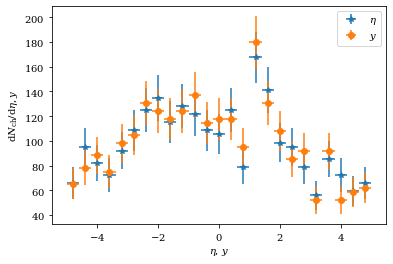

In [5]:
from matplotlib.pyplot import xlabel, ylabel, legend

bins = linspace(-5,5,26)
y    = genRapidities((1000,1001))
heta = dyTodeta(y,bins=bins)
hy   = histogram(y,bins=bins,normalize=False)
plot_hist(*heta,fmt='*',label=r'$\eta$')
plot_hist(*hy,  fmt='o',label=r'$y$')

xlabel(r"$\eta$, $y$")
ylabel(r"$\mathrm{d}N_{\mathrm{ch}}/\mathrm{d}\eta,y$")
legend();

Så langt så godt.  Nu mangler vi bare det femte og sidste skridt.   I dette skridt vil vi lave $N$ begivenheder og finde fordelingerne $\mathrm{d}N_{\mathrm{ch}}/\mathrm{d}\eta,y$ for hver begivenhed. Dernæst vil vi, for hver $\eta$ og $y$ bøtte, beregne gennemsnittet og dennes usikkerhed.  

Vi laver en funktion til at gennemfører denne simulation.  Funktionen tager som argumenter 

- $N$ - antallet af begivenheder vi vil lave 
- Et minimum og maximum antal partikler per begivenhed. 
- Bøttegrænser 
- vores parametre $a$ og $\sigma$

Funktioen vil returnerer 

- de gennemsnitlige $\mathrm{d}N_{\mathrm{ch}}/\mathrm{d}\eta,y$ og deres usikkerheder, 
- bøtte midpunkter og breder. 

So far so good. Now we just lack the fifth and final step. In this step we will create $N$ events and find the distributions $\mathrm{d}N_{\mathrm{ch}}/\mathrm{d}\eta,y$ for each event. Next, for each $\eta$ and $y$ bin, we want to calculate the average and its uncertainty.

We make a function to perform this simulation. The function takes as arguments

- $N$ - the number of events we want to make
- A minimum and maximum number of particles per event.
- Bin boundaries
- our parameters $a$ and $\sigma$

The function will return

- the average $\mathrm{d}N_{\mathrm{ch}}/\mathrm{d}\eta,y$ and their uncertainties,
- bin midpoints and wide.

In [6]:
def simulate(nevents,nrange=(60,70),bins=linspace(-5,5,26),a=1/2,sigma=4):
    from numpy import diff
    
    weta = Welford(len(bins)-1)
    wy   = Welford(len(bins)-1)
    x    = (bins[1:]+bins[:-1])/2 
    dx   = diff(bins)
    
    for i in range(nevents):
        y        = genRapidities(nrange,sigma=sigma)
        yeta, *_ = dyTodeta(y, bins=bins,a=a)
        yy,   *_ = histogram(y,bins=bins,normalize=False)
        weta.update(yeta)
        wy  .update(yy)
        
        
    return weta.mean, weta.sem, wy.mean, wy.sem, x, dx 

Bemærk at vi _ikke_ propagerer fejlen i hver enkelt begivenhed til vores gennemsnit.  Hvis vi gjorde ville vi begå den fejl at vores slut usikkerhed ikke ville repræsenterer fejlen på vors gennemsnit. 

Her har vi brugt vores klasse  `Welford` til at beregne gennemsnittet.   Hvis vores begivenheder havde forskellige vægte eller at hver $\eta$ eller $y$ bøtte havde forskellige vægte kunne vi have brugt vores `West` klasse.   Hvis vi yderligere var interesseret i kovariancen henover $\eta$ og $y$ bøtter kunne vi have initialiseret med kovarians. 

For denne slags analyse, hvor vi kan smide begivenhedens data væk når vi er færdig med den, giver det mening at bruge løbende beregninger som f.eks. `Welford` og `West`. 

Note that we _do not_ propagate the error in each event to our average. If we did, we would make the mistake that our final uncertainty would not represent the uncertainty of our averages.

Here we have used our class `Welford` to calculate the average. If our events had different weights or that each $\eta$ or $y$ bin had different weights, we could have used our `West` class. If we were further interested in the covariance over $\eta$ and $y$ bins we could have initialized including the covariance. 

For this kind of analysis, where we can discard the event data as soon as we are done with it, it makes sense to use on-line calculations such as `Welford` or `West`. 

Lad os lave $100\,000$ begivenheder med 

- antal partikler $n\in[60,70]$
- $a=1/2$
- $\sigma=4$
- i 25 bøtter over $\eta,y\in[-5,5]$

(Disse parametre passer nogenlunde på proton-proton stød ved $\sqrt{s}=7\,\text{TeV}$)

Vi laver også grafer af resultatet. 

Let's generate  $100\,000$ events with

- number of particles $n\in[60,70]$
- $a=1/2$
- $\sigma=4$
- in 25 bins over $\eta,y\in[-5,5]$

(These parameters fit roughly with proton-proton collisions at $\sqrt{s}=7\,\text{TeV}$)

We also graph the result.

Anslået (gennemsnitlig) tælletæthed for både pseudorapiditet $\eta$ og rapiditet $y$.

Estimated (average) count density for both pseudorapidity $\eta$ and rapidity $y$.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


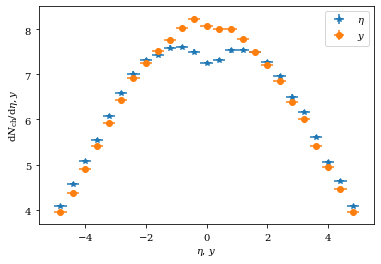

In [7]:
meanEta,uncEta,meanY,uncY,xEtaY,dEtaY = simulate(10000)

plot_hist(meanEta,xEtaY,dEtaY,uncEta, fmt="*",label=r"$\eta$")
plot_hist(meanY,  xEtaY,dEtaY,uncY,   fmt="o",label=r"$y$")
xlabel(r"$\eta$, $y$")
ylabel(r"$\mathrm{d}N_{\mathrm{ch}}/\mathrm{d}\eta,y$")
legend();

## Opsummering

Vi har set et eksempel på brugen af profiler.  Dette er ment som inspiration til andre analyser.  Vi har ikke formuleret egentlige faste procedure for profiler, men vi har gjort brug af forskellig funktionalitet vi har udviklet ovenover. 

## Summary

We have seen an example of the use of profiles. This is meant as inspiration for other analyzes. We have not formulated actual procedures for profiles, but we have made use of different functionality we have developed above.